Linear Method

## Commentaires et communication entre nous:

J'ai changé l'évalution des erreurs, j'avais calculé des MSE en général, mais sur kaggle on sera évalués sur la RMSE, ça change presque rien mais comme ça c'est pareil. Parfait, merci

In [52]:
data <- read.csv(file.path("..", "data", "training_data.csv"))
data<-data[,-which(names(data) %in% c("SWEETORSOUR"))] #to remove the SWEETORSOUR response variable
dim(data)
data$Intensity<-as.numeric(as.factor(data$Intensity)) #more efficient, this way we only have one column with 2=high, 1=low
data<-data[ , which(apply(data, 2, var) != 0)] #remove all columns with variance=0 (900 columns)
dim(data)

[1]  708 4871

[1]  708 3029

In [53]:
set.seed(199)
idx.train <- sample(nrow(data), nrow(data)/2)
data.train <- data[idx.train,]
data.test <- data[-idx.train,]

In [54]:
#data.train
data.train.y<-data.train$VALENCE.PLEASANTNESS
data.train.x<-data.train[,-(which(names(data.train) %in% c("VALENCE.PLEASANTNESS")))]
#var0.train <- which(apply(data.train.x, 2, var) != 0) maybe avoid removing new colomns otherwise risk of not having the same columns in training and test set
#data.train.x <- data.train.x[,var0.train]
data.train.x.matrix<- as.matrix(data.train.x) #useful for some methods

#data.test
data.test.x<-data.test[,-which(names(data.test) %in% c("VALENCE.PLEASANTNESS"))]
#var0.test <- which(apply(data.test.x, 2, var) != 0)
#data.test.x <- data.test[,var0.test]
data.test.x.matrix<- as.matrix((model.matrix(~.-1, data.test.x)))
data.test.y<-data.test$VALENCE.PLEASANTNESS

In [55]:
#Linear regression on the data set with the test and training errors

set.seed(199)

lm.fit <- lm(VALENCE.PLEASANTNESS ~ ., data.train)
summary(lm.fit)
RSS = sum((data.test$VALENCE.PLEASANTNESS - predict(lm.fit, data.test))^2)
RSS
RMSE=sqrt(mean((data.test$VALENCE.PLEASANTNESS - predict(lm.fit, data.test))^2))
print(RMSE)
#quality.of.fit <- function(fit, data) {
#    RSS <- sum((data$VALENCE.PLEASANTNESS - predict(fit, data))^2)
#    TSS <- sum((data$VALENCE.PLEASANTNESS - mean(data$VALENCE.PLEASANTNESS))^2)
#    cat(c("Residual standard error: ", sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS), " R^2 = ", 1 - RSS/TSS, "\n")) }
#quality.of.fit(lm.fit, data.train)
#quality.of.fit(lm.fit, data.test)

#--> test RSS very high
#-->RMSE is 62719 as a baseline for comparison #but potentially some error


Call:
lm(formula = VALENCE.PLEASANTNESS ~ ., data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.022  -1.907   0.000   1.522  46.652 

Coefficients: (2776 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             1.119e+08  6.241e+07   1.793   0.0760 .
Intensity               2.044e+00  2.907e+00   0.703   0.4835  
complexity.from.pubmed -8.953e+01  4.345e+01  -2.061   0.0419 *
MW                     -2.843e+04  1.665e+04  -1.707   0.0908 .
AMW                    -4.267e+05  2.333e+05  -1.829   0.0703 .
Sv                      7.638e+06  4.219e+06   1.810   0.0732 .
Se                      7.733e+06  4.225e+06   1.831   0.0701 .
Sp                     -1.929e+06  1.056e+06  -1.827   0.0707 .
Si                      3.347e+06  1.865e+06   1.795   0.0756 .
Mv                      1.060e+07  5.811e+06   1.824   0.0712 .
Me                      3.446e+05  1.509e+05   2.284   0.0245 *
Mp            

Warning message in predict.lm(lm.fit, data.test):
"prediction from a rank-deficient fit may be misleading"

[1] 1.392539e+12

Warning message in predict.lm(lm.fit, data.test):
"prediction from a rank-deficient fit may be misleading"

[1] 62719.42


Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"4619  linear dependencies found"

Reordering variables and trying again:


[1] 0.06120547 0.10218147 0.14013607 0.17490099 0.19829864 0.22125544
 [7] 0.23970284 0.25567691 0.27179090 0.28863621 0.30113360 0.31331523
[13] 0.32639089 0.33934170 0.35277216 0.36688025 0.37615975 0.38347325
[19] 0.39322008 0.40096030 0.40879091 0.41691453 0.42307445 0.43050642
[25] 0.43814638 0.44573683 0.45482231 0.46007376 0.46709285 0.47644660
[31] 0.48451614 0.49197573 0.49908982 0.50697533 0.51269861 0.51841979
[37] 0.52348451 0.52802851 0.53271492 0.53748776 0.54126731

ERROR: Error in xy.coords(x, y): objet 'regfit.fwd.summary' introuvable


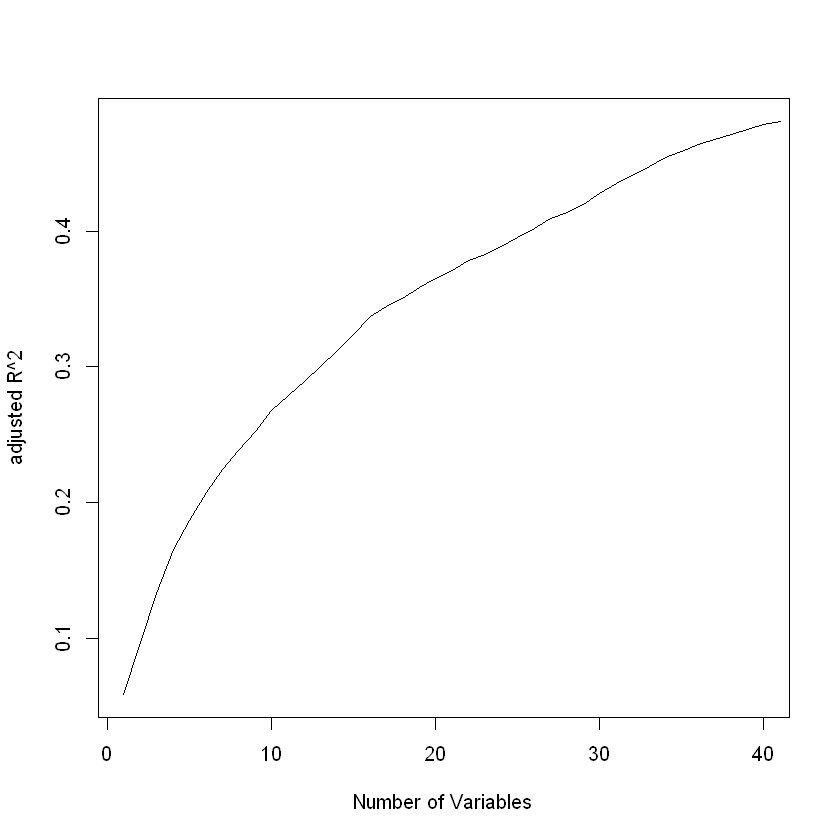

In [32]:
#Foreward selection without cross validation

library(leaps)
nvmax = 40 # Which nmax ? with 40 ~10min to run
reg.fit <- regsubsets(VALENCE.PLEASANTNESS~., data.train, really.big = T, method = 'forward', nvmax = nvmax) 
regfit.summary <- summary(reg.fit)
summary(reg.fit)$rsq

plot(regfit.summary$adjr2, type = "l", xlim = c(1,nvmax), xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

#--> The adjusted R^2 increase with the nb of variables
#--> But : R^2 adjusted is not appropriate in high dimensions : R^2 adjusted = 1 if RSS = 0
#--> Better to mix forward selection with cross validation

In [68]:
#Cross-validation with on each fold foreward selection

#install.packages('tidymodels')
library(leaps)
library(tidymodels)

predict.regsubsets <- function(object, newdata, id, form = as.formula(object$call[[2]])) {
    mat = model.matrix(form, newdata)
    coefi = coef(object, id=id)
    xvars = names(coefi)
    mat[,xvars]%*%coefi
}

evaluate <- function(fold, fit, formula = VALENCE.PLEASANTNESS ~ .) {
    valid.set <- assessment(fold)
    sapply(seq(1, fit$nvmax - 1),
           function(id) mean((valid.set$VALENCE.PLEASANTNESS - predict(fit, valid.set, id, formula))^2))
}
           
validation_data <- vfold_cv(data.train, v = 5)
fit_and_evaluate <- function(fold, formula = VALENCE.PLEASANTNESS ~ .) {
    fit <- regsubsets(formula, analysis(fold), method = "forward", nvmax = 30)
    evaluate(fold, fit)
}
           
cv.errors <- sapply(validation_data$splits, fit_and_evaluate)
mean.cv.errors <- rowMeans(cv.errors)
           
#Long à compiler genre env 20-30min
#peut etre à essayer avec d'autre v ou nvmax

Warning message:
"package 'tidymodels' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidymodels' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'magrittr' 1.5 is already loaded, but >= 2.0.0 is required


475.6237,534.5281,591.3750,445.5185,595.7780
483.8212,553.1420,573.3426,441.9789,603.8234
470.3109,533.9315,557.4054,445.2808,579.6635
458.2269,506.5426,557.0520,437.1216,573.5884
421.3286,504.4459,558.4996,448.0889,580.0857
402.0673,525.5716,554.3610,431.9322,579.2968
406.4979,518.8017,543.4862,425.6350,559.8798
414.1889,535.9558,530.8341,413.7288,574.8729
404.0203,539.6585,525.9302,432.3037,588.1381
412.2119,544.3065,527.4625,430.7358,580.9671
411.5255,539.9099,539.1201,432.7625,587.1989


[1] 528.5647 531.2216 517.3184 506.5063 502.4897 498.6458 490.8601 493.9161
 [9] 498.0102 499.1368 502.1034 501.5692 504.0085 512.2375 528.3150 532.0974
[17] 531.6066 539.3419 544.5624 549.7021 553.3806 558.7811 559.6011 558.3041
[25] 561.0020 562.0201 572.8948 569.1477 568.7314 581.4258 581.3331

[1] 7

[1] 490.8601

[1] "RMSE cv min : 22.1553631685622"


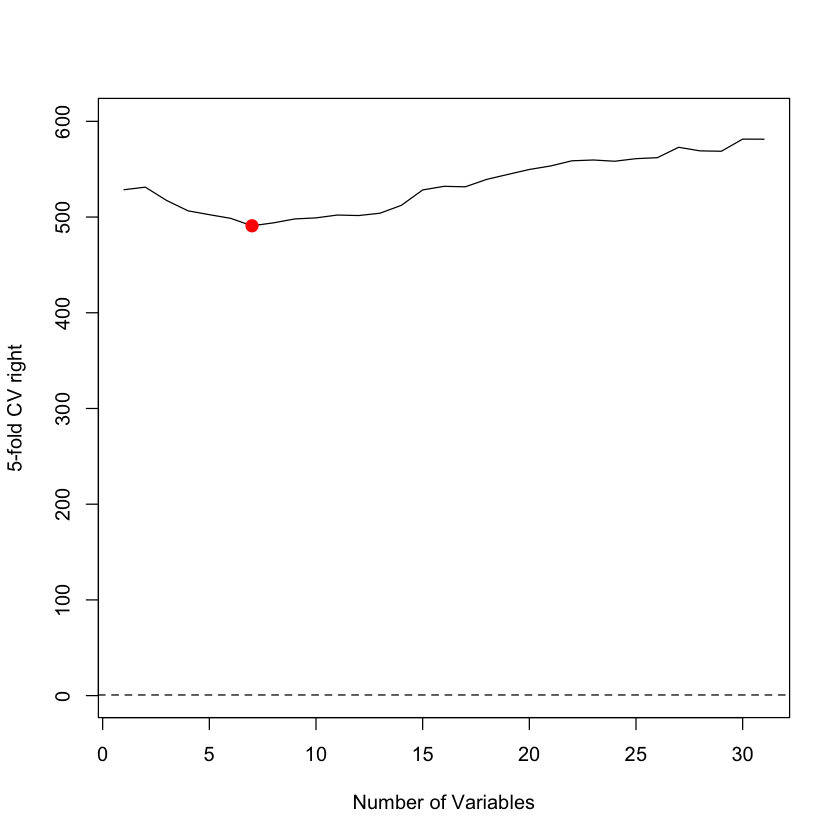

In [47]:
cv.errors
mean.cv.errors           
plot(mean.cv.errors, type = "l", ylim = c(1, 600), xlab = "Number of Variables", ylab = "5-fold CV right")
cv.min = which.min(mean.cv.errors)
cv.min #11
mean.cv.errors[cv.min] #297.123
points(cv.min, mean.cv.errors[cv.min], col = "red", cex = 2, pch = 20)
abline(sd(data$Y), 0, lty = "dashed")

print(paste0('RMSE cv min : ', sqrt(mean.cv.errors[cv.min])))
#--> The errors are very high around 300 : the min error = 297 with cv min =11
#--> I think with a higher nvmax it should give a better error but it will take higher amount of time to run 

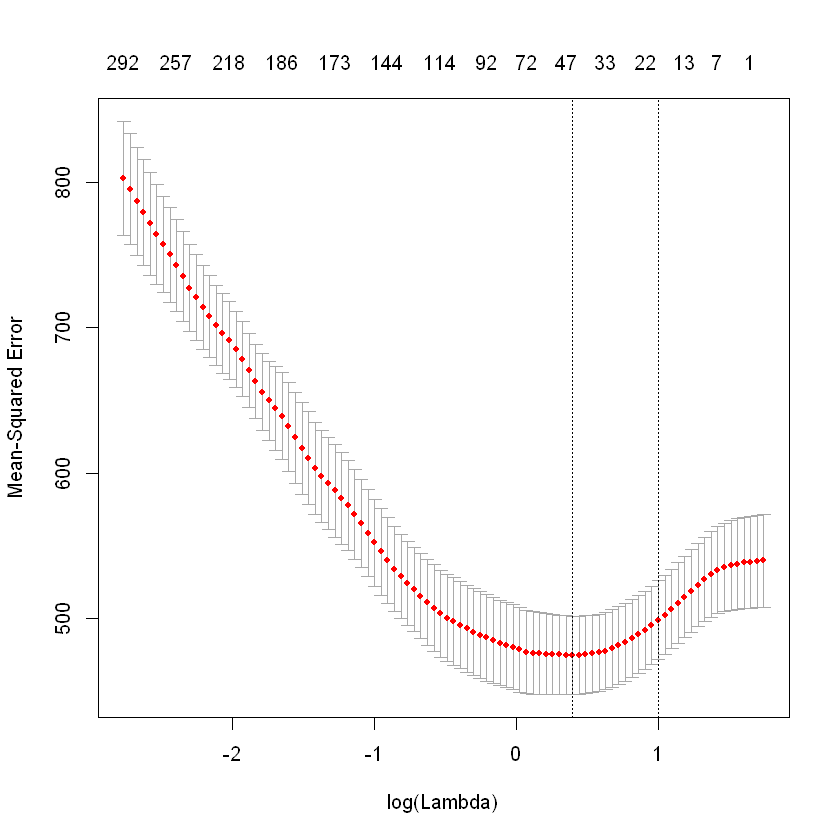

In [57]:
#Cross-validation Lasso
set.seed(12)
#install.packages('glmnet')
library(glmnet)

#cross-validation lasso on training set
cv.lasso <- cv.glmnet(data.train.x.matrix, data.train.y, alpha = 1)
plot(cv.lasso)
best.lasso <- glmnet(data.train.x.matrix, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
coeffs<-coef(best.lasso)
#best number of predictors is always changing if the seed is not set??

In [59]:
y<-predict(best.lasso,data.train.x.matrix)
RMSE.train=sqrt(mean((y-data.train.y)**2))
RMSE.train

[1] 19.30019

In [60]:

#test lasso regularization on test set
y<-predict(best.lasso, data.test.x.matrix)
RMSE.test=sqrt(mean((y-data.test.y)**2))

RMSE.test
#22.57 quite good

[1] 22.57012

[1] "RMSE for training set: 18.7726252859476"
[1] "RMSE for test set: 22.5009722975498"


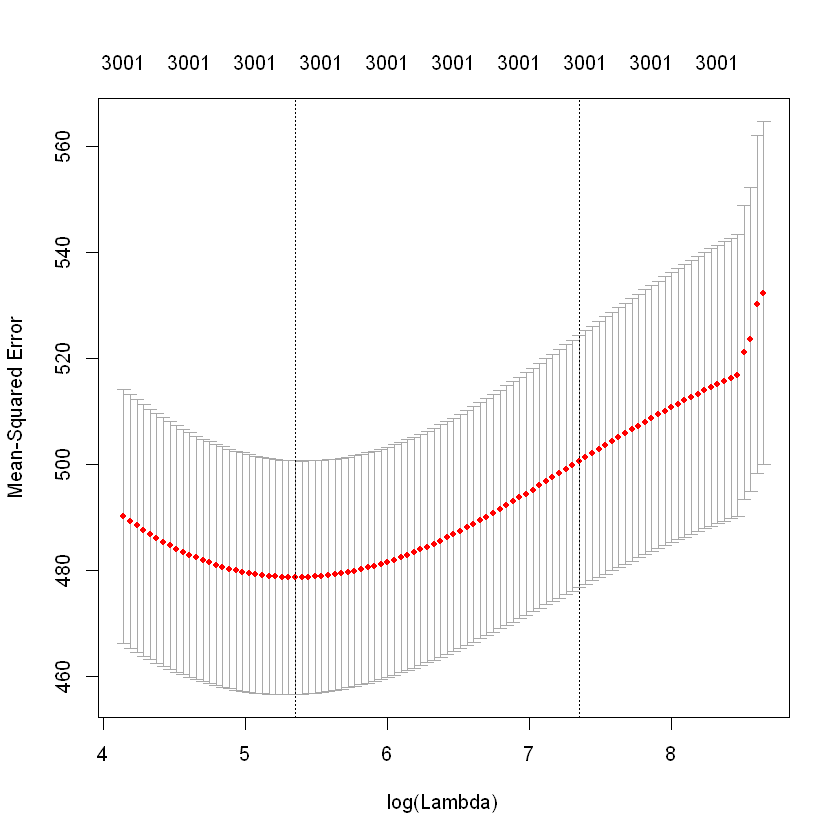

In [62]:
#Same process using Ridge regularization
set.seed(12)

#cross-validation ridge on training set
cv.ridge <- cv.glmnet(data.train.x.matrix, data.train.y, alpha = 0)
plot(cv.ridge)
best.ridge <- glmnet(data.train.x.matrix, data.train.y, alpha = 0, lambda = cv.ridge$lambda.min)
coeffs<-coef(best.ridge)

#use model on training data set
y<-predict(best.ridge,data.train.x.matrix)
RMSE.train=sqrt(mean((y-data.train.y)**2))
print(paste0("RMSE for training set: ",RMSE.train))

#test ridge regularization on test set
y<-predict(best.ridge, data.test.x.matrix)
RMSE.test=sqrt(mean((y-data.test.y)**2))

print(paste0("RMSE for test set: ",RMSE.test))

In [27]:
## The results are better with lasso regularization and we will choose lasso regularization with the bootstrap approach.
#actually without variance 0 cols, better with ridge

In [66]:
#The data might have confounder effect, we are going to try using bootstrap data sets

bootstrap<-function(data) data[sample(nrow(data),nrow(data),replace=T),]

fitted.coefficients.lasso <- function(data){
    #prepare data
    datax<-data[,-which(names(data) %in% c("VALENCE.PLEASANTNESS"))]
    datax<- model.matrix(~.-1, datax)
    datay<-data$VALENCE.PLEASANTNESS

    cv.lasso <- cv.glmnet(datax, datay, alpha = 0) #0 is ridge, have to change the name of the method
    best.lasso <- glmnet(datax, datay, alpha = 0, lambda = cv.lasso$lambda.min)
    return(coef(best.lasso))
}

#not functionning
summarize <- function(coeffs) {
    m <- Matrix::rowMeans(coeffs)
    B <- ncol(coeffs)
    data.frame(Estimate = m, Std.Error = sqrt(1/(B-1)*rowSums((coeffs - m)^2)))
}
#number of bootstrap data.sets
B=3
#summarize( #je n'ai pas encore réussi à faire une fonction correcte pour summarize..
m<-replicate(B,fitted.coefficients.lasso(bootstrap(data.train)))

In [67]:
beta<-rowMeans(m[[1]][],m[[2]][],m[[3]][]) #permet de visualiser les résultats pour le bootstrap, il faudrait trouver une fonction pour les calculer

bias_input <- function(X) cbind(rep(1, ifelse(is.null(nrow(X)), length(X), nrow(X))), X)

#check before matrix mutliplication
#length(beta) print if you need
#preparation of train set to fit output form
data.train.prep<-bias_input(data.train.x.matrix) #add column of 1 for the intercept


#compute train error
y.pred<-data.train.prep%*%beta
RMSE_bootstrap.train<-sqrt(mean((y.pred-data.train.y)**2))
print(paste0("RMSE on the training data with bootstrap: ",RMSE_bootstrap.train))

#compute test error
data.test.prep<-bias_input(data.test.x.matrix) #add column of 1 for the intercept
y.test.pred<-data.test.prep%*%beta
RMSE_bootstrap.train<-sqrt(mean((y.test.pred-data.test.y)**2))
print(paste0("RMSE on the test data with lasso regularization and bootstrap: ",RMSE_bootstrap.train))

#résultats légèrement meilleurs que sans bootstrap sur le train set mais pas le test set
#meilleurs resultats avec ridge regulrization que lasso

[1] "RMSE on the training data with bootstrap: 23.3922197795345"
[1] "RMSE on the test data with lasso regularization and bootstrap: 23.9791817694812"


In [ ]:
#Test with gradient descent (je te laisse mes data préparées si ça t'es utile)

In [42]:
#library(ADtools) can not be installed easily locally on windows, essai avec un algorithm trouvé sur kaggle
#install.packages('ADtools')
library('ADtools')
gradient_descent <- function(f, params, fix = list(),
                             learning_rate = 0.01,
                             tol = 1e-6,
                             maxsteps = 10^3,
                             show = F) {
  history <- rep(0, maxsteps)
  for (i in 1:maxsteps) {
    df <- auto_diff(f, at = append(params, fix), wrt = names(params))
    if (show) print(df@x)
    history[i] <- df@x
    delta <- learning_rate * as.numeric(df@dx) 
    params <- relist(unlist(params) - delta, params)
    #print(delta)
    if (max(abs(delta)) < tol) break #cette ligne ne fait compiler le result du bas ???
  }
  append(params, list(history = history))
}

params <- lm.fit$coefficients
params[is.na(params)] <- 0 #replace the NA betas by 0
params.train <- params[var0.train]
params.test <- params[var0.test]
#params
#data.train.x

lm_loss <- function(params, X, Y) mean((Y - X %*% params)^2)


lm_loss(params[var0.train], data.train.x, data.train.y)
lm_loss(params[var0.test], data.test.x, data.test.y)

#--> loss function very big ??? 
#Ce n'est pas normal ?? ou oui

[1] 1.513378e+18

[1] 6.298559e+15

In [43]:
#With training set
result.train <- gradient_descent(f = lm_loss, learning_rate = 1e-1,
                            maxsteps = 500,
                            params = list(params = params.train),
                            fix = list(X = data.train.x, Y = data.train.y))
#ne compile pas si il y a la ligne : if (max(abs(delta)) < tol) dans la fonction gradient descent
#si on enleve compile mais resultats très bizarre
#j'ai l'impression que gradient descent n'arrive pas a mettre une valeur dans delta ??
plot(result.train$history, ylab = "training loss", xlab = "iteration")

ERROR: Error in if (max(abs(delta)) < tol) break: valeur manquante là où TRUE / FALSE est requis


In [34]:
#With test set
result.test <- gradient_descent(f = lm_loss, learning_rate = 1e-1,
                            maxsteps = 500,
                            params = list(params = params.test),
                            fix = list(X = data.test.x, Y = data.test.y))
plot(result.test$history, ylab = "test loss", xlab = "iteration")

   [1]  2.251366e+07  5.053485e+08  1.278095e+09  1.627590e+09  7.367403e+07
   [6]  1.461765e+08  2.561744e+08  1.587588e+08  2.922824e+08  6.462500e+06
  [11]  1.121867e+07  6.993768e+06  1.274890e+07  2.579327e+08  1.137288e+08
  [16]  2.536332e+08  1.094293e+08  3.896582e+07  1.343841e+08  3.832862e+07
  [21]  1.534810e+06  1.094366e+07  5.523798e-02  2.802216e+07  1.442039e+08
  [26]  9.095486e+07  2.150003e+06  1.879000e+07  0.000000e+00  1.833934e+06
  [31]  0.000000e+00  6.157391e+08  3.971895e+08  1.241952e+07  0.000000e+00
  [36]  5.198852e+07  3.890310e+07  6.323681e+04  6.958844e+06  7.528381e+06
  [41]  3.947507e+07  3.782926e+07  8.229050e+05  3.720193e+06  2.079072e+05
  [46]  6.181339e+06  6.389322e+06  5.724655e+06  6.323850e+04  1.268737e+05
  [51]  1.834555e+06  5.187527e+06  2.466522e+01  2.700971e+01  3.161195e+05
  [56]  3.099895e+06  2.671777e+06  1.807736e+06  2.992277e+06  4.199926e+07
  [61]  1.834588e+08  5.575573e+02  1.086072e+03  1.131579e+07  4.753011e+08

ERROR: Error in if (max(abs(delta)) < tol) break: valeur manquante là où TRUE / FALSE est requis


In [36]:
#Regularization with gradient descent
regularized_loss <- function(loss, lambda0 = 0, lambda1 = 0) {
    function(params, X, Y) {
        loss(params, X, Y) + lambda0 * sum(sqrt(params^2)) + lambda1 * sum(params^2)
    }
}


result.train.lasso <- gradient_descent(regularized_loss(lm_loss, lambda1 = 5),
                           learning_rate = 1e-4,
                           params = list(params = params.train),
                           fix = list(X = data.train.x, Y = data.train.y))
result.train$params

result.test.lasso <- gradient_descent(regularized_loss(lm_loss, lambda1 = 5),
                           learning_rate = 1e-4,
                           params = list(params = params.test),
                           fix = list(X = data.test.x, Y = data.test.y))
result.test$params


   [1] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [19] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [37] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [55] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [73] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [91] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
 [109] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
 [127] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
 [145] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
 [163] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
 [181] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
 [199] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
 [217] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N

ERROR: Error in if (max(abs(delta)) < tol) break: valeur manquante là où TRUE / FALSE est requis


In [48]:
#Essai avec une fonction

compCost<-function(X, y, theta){
   m <- length(y)
   J <- sum((X%*%theta- y)^2)/(2*m)
   return(J)
}

gradDescent<-function(X, y, theta, alpha, num_iters){
   
  m <- length(y)
  J_hist <- rep(0, num_iters)
  for(i in 1:num_iters){

# this is a vectorized form for the gradient of the cost function
# X is a 100x5 matrix, theta is a 5x1 column vector, y is a 100x1 column vector
# X transpose is a 5x100 matrix. So t(X)%*%(X%*%theta - y) is a 5x1 column vector
    theta <- theta - alpha*(1/m)*(t(X)%*%(X%*%theta - y))
    
# this for-loop records the cost history for every iterative move of the gradient descent,
# and it is obtained for plotting number of iterations against cost history.
    J_hist[i]  <- compCost(X, y, theta)
  }
# for a R function to return two values, we need to use a list to store them:
  results<-list(theta, J_hist)
  return(results)
}


                       [,1]
Intensity               NaN
complexity.from.pubmed  NaN
MW                      NaN
AMW                     NaN
Sv                      NaN
Se                      NaN
Sp                      NaN
Si                      NaN
Mv                      NaN
Me                      NaN
Mp                      NaN
Mi                      NaN
nAT                     NaN
nSK                     NaN
nBT                     NaN
nBO                     NaN
nBM                     NaN
SCBO                    NaN
RBN                     NaN
RBF                     NaN
nDB                     NaN
nTB                     NaN
nAB                     NaN
nH                      NaN
nC                      NaN
nN                      NaN
nO                      NaN
nS                      NaN
nI                      NaN
nHM                     NaN
nHet                    NaN
nX                      NaN
H.                      NaN
C.                      NaN
N.                  

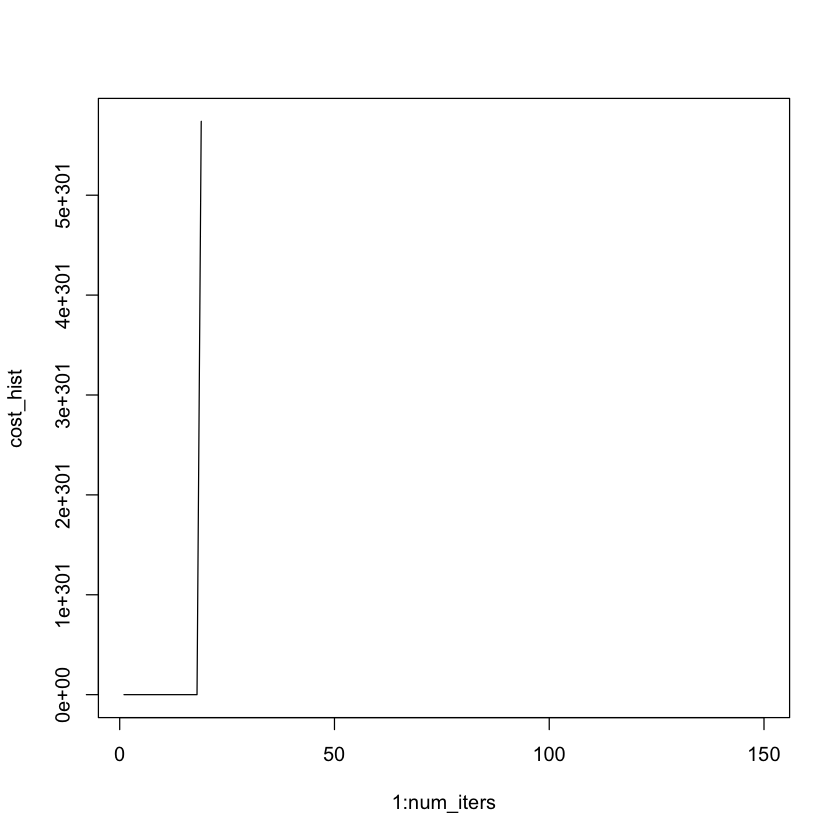

In [50]:
alpha <- .1
num_iters <- 150
theta <- params.train
results <- gradDescent(data.train.x, data.train.y, theta, alpha, num_iters)
theta <- results[[1]]
cost_hist <- results[[2]]
print(theta)
plot(1:num_iters, cost_hist, type = 'l')

In [31]:
#Try GAM
library(mgcv)
data1x<-data.train[,-which(names(data.train) %in% c("VALENCE.PLEASANTNESS"))]

gam<-gam(formula=(VALENCE.PLEASANTNESS~s(data1x)), data=data.train, family="gaussian")


ERROR: Error in model.frame.default(formula = VALENCE.PLEASANTNESS ~ 1 + data1x, : type (list) incorrect pour la variable 'data1x'


In [30]:
y.pred<-predict(gam, data.train, type="response")

Warning message in predict.gam(gam, data.train, type = "response"):
"not all required variables have been supplied in  newdata!
"

## Pour toutes les cellules à éliminer que je garde dans le doute pour l'instant

In [15]:
                #data1 <- as.matrix(data_prepared) #--> Je n'arrive pas à changer les data en matrice pour pouvoir utiliser la regularization ??

                #-->Je ne sais pas si c'est la meilleure solution mais glmnet ne gère apparement pas les variables en catégories, il faut donc les remplacer par des dummy variables

                #filtre sur les données numériques pour ne pas prendre les columnes avec variance 0 et ne pas prendre la réponse, rend le calcul compliqué je ne sais pas si c'est nécessaire
                #cols = names(data.dummy[, sapply(data.dummy, function(v) var(v) != 0)]) #eliminate columns woth zero variance

                ##--> mieux de faire sur data.train? 
                #prepare dummy variables
data1x<-data.train[,-which(names(data.train) %in% c("VALENCE.PLEASANTNESS"))]
#levels(data1x$Intensity) <- c(1,0) #more efficient, this way we only have one column with 1=high, 0=low
#data1x<-as.matrix(data1x)
#data1x
#data1x <- model.matrix(~.-1, data1x)#creates dummy variables
data1y<-data.train$VALENCE.PLEASANTNESS

#prepare test data

data1x.test<-data.test[,-which(names(data.test) %in% c("VALENCE.PLEASANTNESS"))]
data1x.test<- model.matrix(~.-1, data1x.test)
data1y.test<-data.test$VALENCE.PLEASANTNESS
